In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('data sets/autisimdataset.csv')
data.info()
#data pre-processing
print(data['Sex'].unique())
print(data['Jaundice'].unique())
print(data['Family_mem_with_ASD'].unique())
print(data['Class/ASD Traits '].unique())
data['Sex']=data['Sex'].map({'f':1,'m':0})
data['Jaundice']=data['Jaundice'].map({'yes':1,'no':0})
data['Family_mem_with_ASD']=data['Family_mem_with_ASD'].map({'yes':1,'no':0})
data['Class/ASD Traits ']=data['Class/ASD Traits '].map({'Yes':1,'No':0})
data=data.drop('Ethnicity',axis=1)
data=data.drop('Who completed the test',axis=1)
x=data.drop('Class/ASD Traits ',axis=1)
y=data['Class/ASD Traits ']
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
#training the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [7]:
import joblib
joblib.dump(rf_model, "random_forest_asd_model.pkl")

['random_forest_asd_model.pkl']

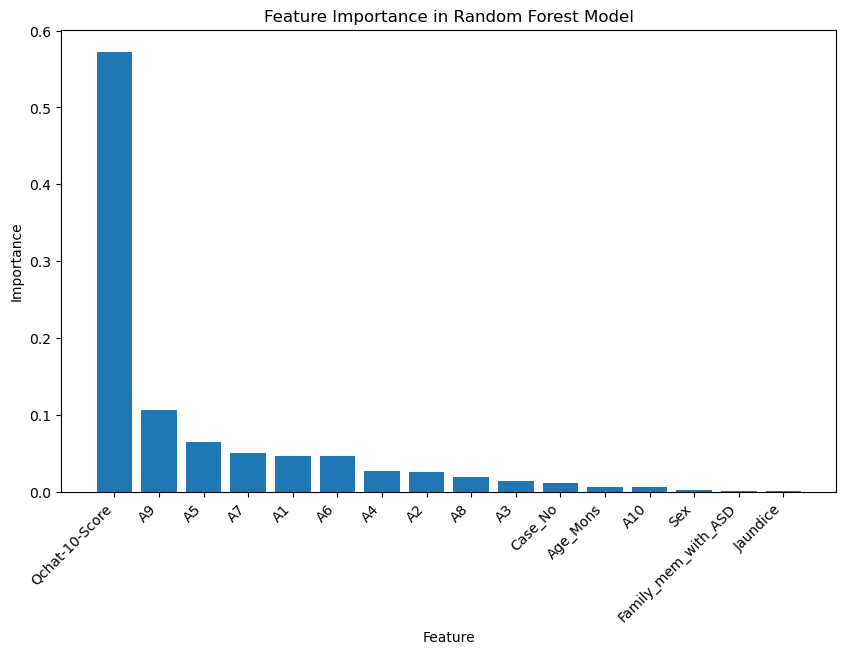

In [2]:
#testing the model
import matplotlib.pyplot as plt
import pandas as pd
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy")
grid_search.fit(x, y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Accuracy: 1.0
